In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('image.jpeg')

In [3]:
# convert the image to grayscale format
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

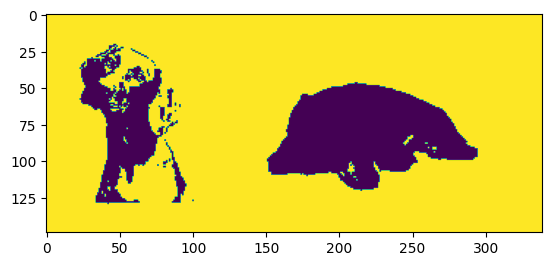

In [4]:
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
# visualize the binary image
plt.imshow(thresh)

In [5]:

cv2.imwrite('image_thres1.jpg', thresh)

True

In [6]:
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

In [7]:

# draw contours on the original image
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [103, 255, 103],
        ...,
        [110, 255, 110],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [111, 255, 111],
        ...,
        [119, 255, 119],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

True

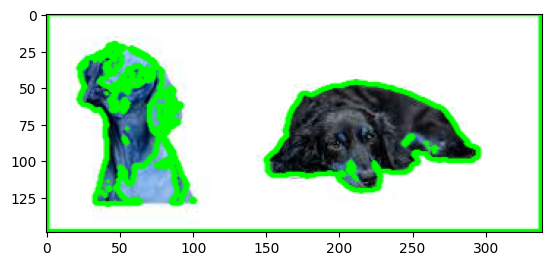

In [8]:
from google.colab.patches import cv2_imshow

# see the results
plt.imshow(image_copy)
cv2.imwrite('contours_none_image1.jpg', image_copy)


True

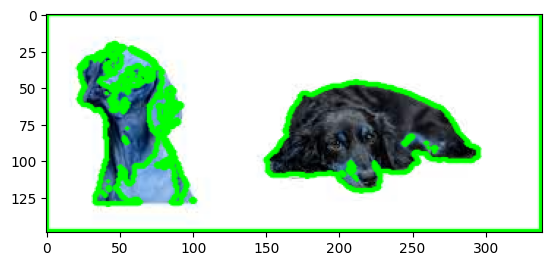

In [9]:
contours1, hierarchy1 = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw contours on the original image for `CHAIN_APPROX_SIMPLE`
image_copy1 = image.copy()
cv2.drawContours(image_copy1, contours1, -1, (0, 255, 0), 2, cv2.LINE_AA)
# see the results
plt.imshow(image_copy1)
cv2.imwrite('contours_simple_image1.jpg', image_copy1)

In [12]:
# to actually visualize the effect of `CHAIN_APPROX_SIMPLE`, we need a proper image
image1 = cv2.imread('image.jpeg')
img_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

In [13]:

ret, thresh1 = cv2.threshold(img_gray1, 150, 255, cv2.THRESH_BINARY)
contours2, hierarchy2 = cv2.findContours(thresh1, cv2.RETR_TREE,
                                               cv2.CHAIN_APPROX_SIMPLE)

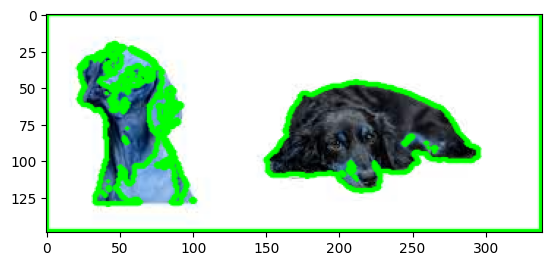

In [14]:
image_copy2 = image1.copy()
cv2.drawContours(image_copy2, contours2, -1, (0, 255, 0), 2, cv2.LINE_AA)
plt.imshow( image_copy2)

True

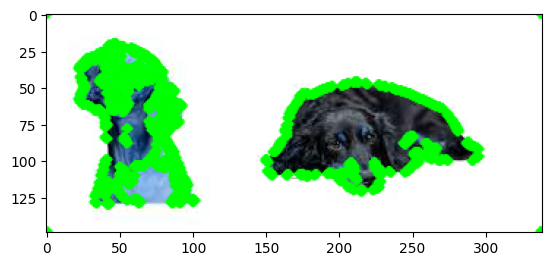

In [15]:

image_copy3 = image1.copy()
for i, contour in enumerate(contours2): # loop over one contour area
   for j, contour_point in enumerate(contour): # loop over the points
       # draw a circle on the current contour coordinate
       cv2.circle(image_copy3, ((contour_point[0][0], contour_point[0][1])), 2, (0, 255, 0), 2, cv2.LINE_AA)
# see the results
plt.imshow( image_copy3)

cv2.imwrite('contour_point_simple.jpg', image_copy3)
